# Introduction

Hello, I continue to learn from where I left off with this project. In this project, I prepared this project for learning what is the Transfer Learning and how to use two models of deep learning. The models are VGG16 and VGG19. Firstly, I prepared the dataset for models and visualized a few images in the dataset. After I prepared the dataset, I created the models with Keras. After I created the models, I applied the models to the dataset. After I applied the models, I visualized the results of the models. In general, the steps of this work are as follows.

As I mentioned before, I am currently on a learning path. In this learning path, I am improving myself on the topics of deep learning and I realise many projects while learning. I will share projects I have done in this chapter. In this learning path, I would be very happy if you would examine my project and help me with how to improve my project or what I should do in this development path. I wish you a good day and good work.

[For a detailed description of the dataset, please click here](https://www.kaggle.com/datasets/puneet6060/intel-image-classification)

My projects about Deep Learning:<br>
- [Gender Prediction With Logistic Regression](https://www.kaggle.com/code/ihsncnkz/gender-prediction-with-logistic-regression)
- [Cat And Dog Prediction With ANN](https://www.kaggle.com/code/ihsncnkz/cat-and-dog-prediction-with-ann)
- [Linear Regression With Pytorch](https://www.kaggle.com/code/ihsncnkz/linear-regression-with-pytorch)
- [My First Convolutional Neural Network(CNN) Work](https://www.kaggle.com/code/ihsncnkz/my-first-convolutional-neural-network-cnn-work)
- [Predict With CNN Model](https://www.kaggle.com/code/ihsncnkz/predict-with-cnn-model)
- [Logistic Regression, ANN And CNN With Pytorch](https://www.kaggle.com/code/ihsncnkz/logistic-regression-ann-and-cnn-with-pytorch)
- [RNN And LSTM With Keras](https://www.kaggle.com/code/ihsncnkz/rnn-and-lstm-with-keras)
- [Classification With CNN And ResNet - PyTorch - CPU](https://www.kaggle.com/code/ihsncnkz/classification-with-cnn-and-resnet-pytorch-cpu)
- [Classification With CNN And ResNet - PyTorch - GPU](https://www.kaggle.com/code/ihsncnkz/classification-with-cnn-and-resnet-pytorch-gpu)

My projects about Data Science and Machine Learning:
- [GPU Search](https://www.kaggle.com/code/ihsncnkz/gpu-search)
- [EDA And Linear Regression](https://www.kaggle.com/code/ihsncnkz/eda-and-linear-regression)
- [Regression Models](https://www.kaggle.com/code/ihsncnkz/regression-models)
- [Logistic Regression](https://www.kaggle.com/code/ihsncnkz/logistic-regression)
- [Classification With K-Nearest Neighbors(KNN)](https://www.kaggle.com/code/ihsncnkz/classification-with-k-nearest-neighbors-knn)
- [Classification With Support Vector Machine(SVM)](https://www.kaggle.com/code/ihsncnkz/classification-with-support-vector-machine-svm)
- [Classification With Naive Bayes Classification](https://www.kaggle.com/code/ihsncnkz/classification-with-naive-bayes-classification)
- [Decision Tree And Random Forest Classifier Models](https://www.kaggle.com/code/ihsncnkz/decision-tree-and-random-forest-classifier-models)
- [K-Means And Hierarchical Clustering With 3D Plotly](https://www.kaggle.com/code/ihsncnkz/k-means-and-hierarchical-clustering-with-3d-plotly)
- [Natural Language Process(NLP) With Naive Bayes](https://www.kaggle.com/code/ihsncnkz/natural-language-process-nlp-with-naive-bayes)
- [Recommendation System With KNN](https://www.kaggle.com/code/ihsncnkz/recommendation-system-with-knn)

# Content <a id = "cont"></a>
- [Prepare and Review Dataset](#1)
    - [Visualization](#1a)
- [VGG16](#2)
    - [Create Model](#2a)
    - [Training Model](#2b)
    - [Visualize The Result Of Model](#2c)
    - [Save And Load Result](#2d)
        - [Save Result](#2d1)
        - [Load Result](#2d2)
- [VGG19](#3)
    - [Create Model](#3a)
    - [Train Model](#3b)
    - [Visualize The Results Of Model](#3c)
- [CONCLUSION](#4)

In [1]:
!pip install keras

In [2]:
# Import Library
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
import os
from glob import glob

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models, Sequential
from tensorflow.keras import optimizers

from keras.layers.core import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from tensorflow.keras.layers import BatchNormalization
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19

from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

# Prepare and Review Dataset <a id = "1"></a>
[Go Content](#cont)

In this chapter, I prepared the dataset and reviewed the dataset.
- Firstly, I created the data path.
- Secondly, I specified the number of classes.
- Thirdly, I changed the size of the image for the model.

In [3]:
# Test and Train path
# train_path = "../input/intel-image-classification/seg_train/seg_train/"
# test_path = "../input/intel-image-classification/seg_test/seg_test/"

train_data = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/train"
test_data = "C:/Users/Admin/Downloads/Thesis Code/AutismDataset/test"

In [4]:
# The number of classes of dataset
numberOfClass = len(glob(train_data + "/*"))
print("Number Of Class: ", numberOfClass)

Number Of Class:  2540


In [10]:
train_non_autistic = []
train_autistic = []

for i in os.listdir(train_data):
    if 'Non_Autistic' in ("/Users/Admin/Downloads/Thesis Code/AutismDataset/train/{}".format(i)):
        train_non_autistic.append(("/Users/Admin/Downloads/Thesis Code/AutismDataset/train/{}".format(i)))
    else:
        train_autistic.append(("/Users/Admin/Downloads/Thesis Code/AutismDataset/train/{}".format(i)))
        
        
test_non_autistic = []
test_autistic = []

for i in os.listdir(test_data):
    if 'Non_Autistic' in ("/Users/Admin/Downloads/Thesis Code/AutismDataset/test/{}".format(i)):
        test_non_autistic.append(("/Users/Admin/Downloads/Thesis Code/AutismDataset/test/{}".format(i)))
    else:
        test_autistic.append(("/Users/Admin/Downloads/Thesis Code/AutismDataset/test/{}".format(i)))

In [15]:
train_imgs = train_autistic + train_non_autistic
random.shuffle(train_imgs)

In [16]:
# # The images size in dataset.
# image_shape = img_to_array(train_imgs)
# print(image_shape.shape)

In [17]:
# # Prepare the datasef for vgg16
# train_data = ImageDataGenerator().flow_from_directory(train_path, target_size=(324, 268))
# test_data = ImageDataGenerator().flow_from_directory(test_path, target_size=(324, 268))

## Visualization <a id ="1a"></a>
[Go Content](#cont)

In this chapter, I visualized a few images in the dataset.

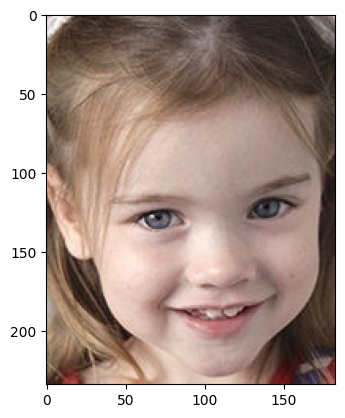

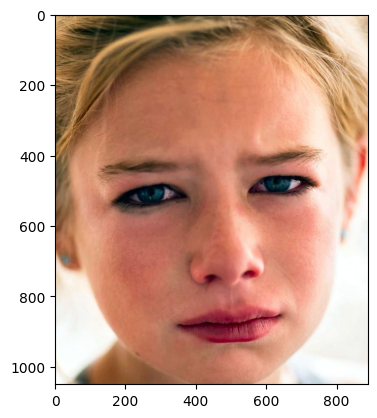

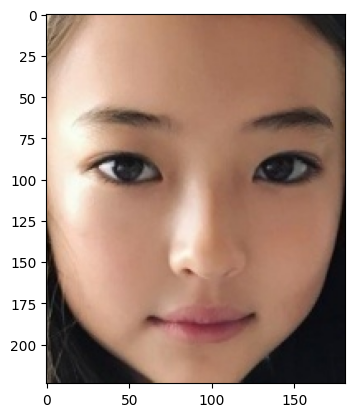

In [18]:
import matplotlib.image as mpimg
for ima in train_imgs[0:3]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

In [19]:
def read_and_process_image(list_of_images):
    X = []
    y = []
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (224, 224), interpolation = cv2.INTER_CUBIC))
        if 'Non_Autistic' in image:
            y.append(0)
        else:
            y.append(1)
            
    return X,y

X_train, y_train = read_and_process_image(train_imgs)

In [20]:
val_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Autistic"
val_non_autistic = "/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Non_Autistic"
val_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Autistic/{}".format(i) for i in os.listdir(val_autistic)]
val_non_autistic_imgs = ["/Users/Admin/Downloads/Thesis Code/AutismDataset/valid/Non_Autistic/{}".format(i) for i in os.listdir(val_non_autistic)]
val_imgs = val_autistic_imgs + val_non_autistic_imgs
random.shuffle(val_imgs)

In [21]:
X_val, y_val = read_and_process_image(val_imgs)

In [22]:
X_val = np.array(X_val)
y_val = np.array(y_val)
X_train = np.array(X_train)
y_train = np.array(y_train)

In [23]:
print("Shape of Train images:", X_train.shape)
print("Shape of Train labels:", y_train.shape)
print("Shape of validation images:", X_val.shape)
print("Shape of validation labels:", y_val.shape)

Shape of Train images: (2540, 224, 224, 3)
Shape of Train labels: (2540,)
Shape of validation images: (100, 224, 224, 3)
Shape of validation labels: (100,)


In [24]:
train_data_length = len(train_data)
test_data_length = len(test_data)

print("Length of train data:", train_data_length)
print("Length of test data:", test_data_length)


Length of train data: 56
Length of test data: 55


# VGG16 <a id = "2"></a>
[Go Content](#cont)

**What is the VGG16?**

A convolutional neural network is also known as a ConvNet, which is a kind of artificial neural network. A convolutional neural network has an input layer, an output layer, and various hidden layers. VGG16 is a type of CNN (Convolutional Neural Network) that is considered to be one of the best computer vision models to date. The creators of this model evaluated the networks and increased the depth using an architecture with very small (3 × 3) convolution filters, which showed a significant improvement on the prior-art configurations. They pushed the depth to 16–19 weight layers making it approx — 138 trainable parameters.

If You want more information about the VGG16 model, [click here.](https://medium.com/p/7315defb5918)

## Create Model <a id = "2a"></a>
[Go Content](#cont)

In this chapter, I created the VGG16 model. At the same time, I made the Transfer Learning.
- Firstly, I imported the vgg16 model.
- Secondly, I created my model and add layers of vgg16 in my model. I didn't add last layer because I will created it separately.
- Thirtly, I closed the layers of vgg16 because I don't want to train those layers again, I just will use the weight and bias values of the layers.
- Endly, I created the last layer and compile of the model.

**What is the Transfer Learning?**

Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.

It is a popular approach in deep learning where pre-trained models are used as the starting point on computer vision and natural language processing tasks given the vast compute and time resources required to develop neural network models on these problems and from the huge jumps in skill that they provide on related problems.

If you want more information about the Transfer Learning, [click here.](https://machinelearningmastery.com/transfer-learning-for-deep-learning/)

In [25]:
# Import model
vgg16 = VGG16()

In [26]:
# Layers of vgg16 
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [27]:
# layers of vgg16
vgg16_layer_list = vgg16.layers
for i in vgg16_layer_list:
    print(i)

In [28]:
# add the layers of vgg16 in my created model.
vgg16Model = Sequential()
for i in range(len(vgg16_layer_list)-1):
    vgg16Model.add(vgg16_layer_list[i])

In [29]:
# the final version of the model
vgg16Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [30]:
# Close the layers of vgg16
for layers in vgg16Model.layers:
    layers.trainable = False

In [31]:
# Last layer
vgg16Model.add(Dense(numberOfClass, activation = "softmax"))

In [32]:
# After I added last layer in created model.
vgg16Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [33]:
# I create compile part.
vgg16Model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

In [34]:
train_data_length = len(train_data)
test_data_length = len(test_data)

print("Length of train data:", train_data_length)
print("Length of test data:", test_data_length)


Length of train data: 56
Length of test data: 55


# Data Augmentation

In [62]:
# BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 4,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./255)

In [63]:
train_data_length = len(train_data)
test_data_length = len(test_data)

print("Length of train data:", train_data_length)
print("Length of test data:", test_data_length)


Length of train data: 56
Length of test data: 55


In [64]:
train_generator = train_datagen.flow(X_train, y_train, batch_size = 32)
val_generator = val_datagen.flow(X_val, y_val, batch_size = 32)

In [65]:
# from pathlib import Path
# from keras.callbacks import ModelCheckpoint, EarlyStopping

In [66]:
# download_dir = Path('C:/Users/Admin/Downloads/Thesis Code')

In [67]:
# train_data_dir = download_dir/'AutismDataset/train'
# test_data_dir = download_dir/'AutismDataset/test'

# # class_subset = (os.listdir(download_dir/'AutismDataset'))[:4] # Using only the first 10 classes

# traingen = train_datagen.flow_from_directory(train_data_dir,
#                                                target_size=(224, 224),
#                                                class_mode='categorical',
#                                                batch_size=BATCH_SIZE, 
#                                             )

# validgen = train_datagen.flow_from_directory(train_data_dir,
#                                                target_size=(224, 224),
#                                                class_mode='categorical',
#                                                batch_size=BATCH_SIZE, )

# testgen = val_datagen.flow_from_directory(test_data_dir,
#                                              target_size=(224, 224),
#                                              class_mode=None,
#                                              batch_size=1,
#                                              shuffle=False,
#                                              seed=42)

## Training Model <a id = "2b"></a>
[Go Content](#cont)

In this chapter, I am training with the model at the dataset, and after, I saved the weight of the model.

In [70]:
# Traning with model
# batch_size = 32

hist_vgg16 = vgg16Model.fit(train_generator,
                              epochs=40,
                              validation_data=val_generator,
                              workers=4,
                              use_multiprocessing=False)


Epoch 1/40


ValueError: in user code:

    File "C:\Users\Admin\.conda\envs\tensorflowNew\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Admin\.conda\envs\tensorflowNew\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Admin\.conda\envs\tensorflowNew\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Admin\.conda\envs\tensorflowNew\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Admin\.conda\envs\tensorflowNew\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Admin\.conda\envs\tensorflowNew\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Admin\.conda\envs\tensorflowNew\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Admin\.conda\envs\tensorflowNew\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Admin\.conda\envs\tensorflowNew\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\Admin\.conda\envs\tensorflowNew\lib\site-packages\keras\backend.py", line 5529, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 2540) are incompatible


In [40]:
# Save the weights of model
vgg16Model.save_weights("deneme.h5")

## Visualize The Result Of Model <a id = "2c"></a>
[Go Content](#cont)

In this chapter, I visualized the result of the vgg16 model.

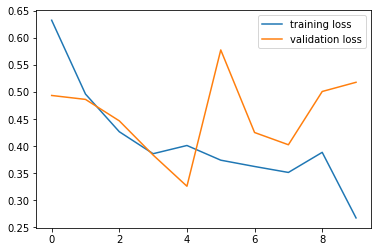

In [41]:
# Loss and Validation Loss
plt.plot(hist_vgg16.history["loss"], label = "training loss")
plt.plot(hist_vgg16.history["val_loss"], label = "validation loss")
plt.legend()
plt.show()

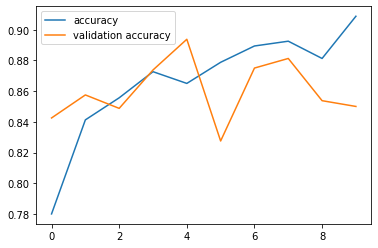

In [42]:
# Accuracy and Validation Accuracy
plt.plot(hist_vgg16.history["accuracy"], label = "accuracy")
plt.plot(hist_vgg16.history["val_accuracy"], label = "validation accuracy")
plt.legend()
plt.show()

## Save And Load Result <a id = "2d"></a>
[Go Content](#cont)

In this chapter, I registered the results of the model and after I read the result I saved again, I visualized its. I visualized it to see if I recorded it correctly.

### Save Result <a id = "2d1"></a>
[Go Content](#cont)

In this chapter, I registered the result of the vgg16 model.

In [43]:
import json, codecs
with open("deneme.json","w") as f:
    json.dump(hist_vgg16.history, f)

### Load Result <a id = "2d2"></a>
[Go Content](#cont)

In this chaper, I read the result I saved again, I visualized its.

In [44]:
with codecs.open("./deneme.json","r", encoding = "utf-8") as f:
    load_result = json.loads(f.read())

In [45]:
load_result

{'loss': [0.6325777173042297,
  0.4963020086288452,
  0.42675143480300903,
  0.3861723244190216,
  0.4013470709323883,
  0.3742385506629944,
  0.3625917434692383,
  0.35159605741500854,
  0.38869476318359375,
  0.2676435708999634],
 'accuracy': [0.7799999713897705,
  0.8412500023841858,
  0.8556249737739563,
  0.872635543346405,
  0.8650000095367432,
  0.8787500262260437,
  0.8893749713897705,
  0.8924999833106995,
  0.8812500238418579,
  0.9087499976158142],
 'val_loss': [0.49369752407073975,
  0.4864516854286194,
  0.446827232837677,
  0.3837083876132965,
  0.32612645626068115,
  0.5777539014816284,
  0.42530959844589233,
  0.4027215242385864,
  0.5010493397712708,
  0.5180352330207825],
 'val_accuracy': [0.8424999713897705,
  0.8575000166893005,
  0.8487499952316284,
  0.8737499713897705,
  0.893750011920929,
  0.8274999856948853,
  0.875,
  0.8812500238418579,
  0.8537499904632568,
  0.8500000238418579]}

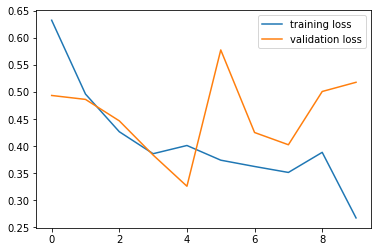

In [46]:
# Loss And Validation Loss
plt.plot(load_result["loss"], label = "training loss")
plt.plot(load_result["val_loss"], label = "validation loss")
plt.legend()
plt.show()

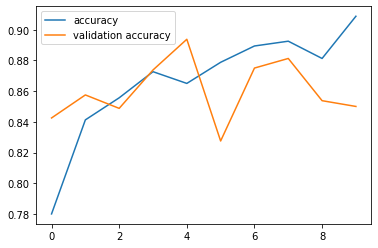

In [47]:
# Accuracy And Validation Accuracy
plt.plot(load_result["accuracy"], label = "accuracy")
plt.plot(load_result["val_accuracy"], label = "validation accuracy")
plt.legend()
plt.show()

# VGG19 <a id = "3"></a>
[Go Content](#cont)

**What is the VGG19?**

The concept of the VGG19 model (also VGGNet-19) is the same as the VGG16 except that it supports 19 layers. The “16” and “19” stand for the number of weight layers in the model (convolutional layers). This means that VGG19 has three more convolutional layers than VGG16.

If you want more information of VGG19 model, [click here.](https://viso.ai/deep-learning/vgg-very-deep-convolutional-networks/)

## Create Model <a id = "3a"></a>
[Go Content](#cont)

In this chapter, I created the VGG19 model. At the same time, I made the Transfer Learning.
- Firstly, I imported the vgg19 model.
- Secondly, I created my model and add layers of vgg16 in my model. I didn't add last layer because I will created it separately.
- Thirtly, I closed the layers of vgg16 because I don't want to train those layers again, I just will use the weight and bias values of the layers.
- Endly, I created the last layer and compile of the model.

If you want short information on Transfer Learning, [click here.](#2a)

In [48]:
# Import VGG19 model
vgg19 = VGG19()

574726144/574710816 [==============================] - 6s 0us/step


In [49]:
# Layers of vgg19
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [50]:
# Layers of vgg19 
vgg19_layer_list = vgg19.layers
for i in vgg19_layer_list:
    print(i)

In [51]:
# add the layers of vgg16 in my created model.
vgg19Model = Sequential()
for i in range(len(vgg19_layer_list)-1):
    vgg19Model.add(vgg19_layer_list[i])

In [52]:
# Finish version of my created model.
vgg19Model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [53]:
# Close the layers of vgg16
for layers in vgg19Model.layers:
    layers.trainable = False

In [54]:
# Last layer
vgg19Model.add(Dense(numberOfClass, activation = "softmax"))

In [55]:
# the final version of the model
vgg19Model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [56]:
# I create compile part.
vgg19Model.compile(loss = "categorical_crossentropy",
             optimizer = "rmsprop",
             metrics = ["accuracy"])

## Train Model <a id = "3b"></a>
[Go Content](#cont)

In this chapter, I am training with the model at the dataset, and after, I saved the weight of the model.

In [57]:
# Training with my created model
hisy_vgg19 = vgg19Model.fit_generator(train_data,
                               steps_per_epoch = 1600 // batch_size,
                               epochs = 10,
                               validation_data = test_data,
                               validation_steps = 800 // batch_size)

Epoch 1/10
50/50 [==============================] - 9s 175ms/step - loss: 0.6366 - accuracy: 0.7725 - val_loss: 0.3857 - val_accuracy: 0.8637
Epoch 2/10
50/50 [==============================] - 8s 152ms/step - loss: 0.4657 - accuracy: 0.8456 - val_loss: 0.3576 - val_accuracy: 0.8763
Epoch 3/10
50/50 [==============================] - 7s 146ms/step - loss: 0.4151 - accuracy: 0.8669 - val_loss: 0.4879 - val_accuracy: 0.8450
Epoch 4/10
50/50 [==============================] - 7s 145ms/step - loss: 0.3459 - accuracy: 0.8800 - val_loss: 0.4789 - val_accuracy: 0.8562
Epoch 5/10
50/50 [==============================] - 7s 138ms/step - loss: 0.3473 - accuracy: 0.8802 - val_loss: 0.3492 - val_accuracy: 0.8788
Epoch 6/10
50/50 [==============================] - 7s 141ms/step - loss: 0.3611 - accuracy: 0.8888 - val_loss: 0.4373 - val_accuracy: 0.8537
Epoch 7/10
50/50 [==============================] - 7s 138ms/step - loss: 0.3204 - accuracy: 0.8888 - val_loss: 0.3504 - val_accuracy: 0.8850
Epoch 

## Visualize The Results Of Model <a id = "3c"></a>
[Go Content](#cont)

In this chapter, I visualized the result of the vgg19 model.

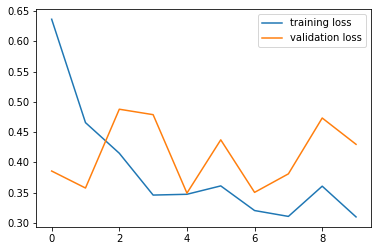

In [58]:
# Loss And Validation Loss
plt.plot(hisy_vgg19.history["loss"], label = "training loss")
plt.plot(hisy_vgg19.history["val_loss"], label = "validation loss")
plt.legend()
plt.show()

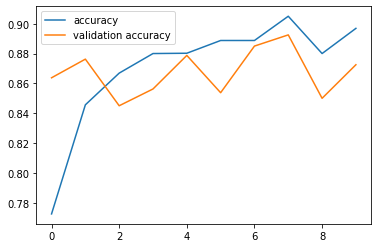

In [59]:
# Accuracy And Validation Accuracy
plt.plot(hisy_vgg19.history["accuracy"], label = "accuracy")
plt.plot(hisy_vgg19.history["val_accuracy"], label = "validation accuracy")
plt.legend()
plt.show()

# CONCLUSION <a id = "4"></a>
---
[Go Content](#cont)

I am learning the English language newly if I make an errata please advise me in the comment. Thank you for reading my notebook, your votes and your comments. I will be waiting for your advice.